In [147]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup


In [148]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://amzn.eu/d/0imL3Mg',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [149]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [150]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            #'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass


In [151]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            #'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            #'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass


In [152]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break


C:\Users\HP\AppData\Local\Temp\ipykernel_76\733389603.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [251]:
df = pd.DataFrame(reviewlist)
df

,Rating,Review
0,4.0,A Midrange phone from oneplus. why I choose th...
1,4.0,I was searching a smartphone in 25-30k segment...
2,4.0,Reviewing about the phone after being used sin...
3,4.0,"*Battery life is decent, if you're a heavy use..."
4,4.0,Bought in big billion day sale but towards the...
...,...,...
4995,5.0,Graet
4996,5.0,Worth for money
4997,4.0,Awesome
4998,1.0,"Hello friends,I bought brand new OnePlus Nord ..."


In [252]:
df.isnull().sum()

Rating    0
Review    0
dtype: int64

In [253]:
df.shape

(5000, 2)

Import libraries

In [156]:
!pip install spacy
!pip install wordcloud

In [228]:
import numpy as np 
import pandas as pd
import string 
import spacy 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [254]:
df

,Rating,Review
0,4.0,A Midrange phone from oneplus. why I choose th...
1,4.0,I was searching a smartphone in 25-30k segment...
2,4.0,Reviewing about the phone after being used sin...
3,4.0,"*Battery life is decent, if you're a heavy use..."
4,4.0,Bought in big billion day sale but towards the...
...,...,...
4995,5.0,Graet
4996,5.0,Worth for money
4997,4.0,Awesome
4998,1.0,"Hello friends,I bought brand new OnePlus Nord ..."


Number of Words

In [255]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,A Midrange phone from oneplus. why I choose th...,133
1,I was searching a smartphone in 25-30k segment...,131
2,Reviewing about the phone after being used sin...,55
3,"*Battery life is decent, if you're a heavy use...",111
4,Bought in big billion day sale but towards the...,123


Number of Characters

In [256]:
df['char_count'] = df['Review'].str.len()
df[['Review','char_count']].head()

,Review,char_count
0,A Midrange phone from oneplus. why I choose th...,707
1,I was searching a smartphone in 25-30k segment...,678
2,Reviewing about the phone after being used sin...,300
3,"*Battery life is decent, if you're a heavy use...",617
4,Bought in big billion day sale but towards the...,706


Number of stopwords

In [257]:
stop = stopwords.words('english')

df['stopwords'] = df['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Review','stopwords']].head()

,Review,stopwords
0,A Midrange phone from oneplus. why I choose th...,57
1,I was searching a smartphone in 25-30k segment...,64
2,Reviewing about the phone after being used sin...,26
3,"*Battery life is decent, if you're a heavy use...",52
4,Bought in big billion day sale but towards the...,46


Number of special characters

In [258]:
df['hashtags'] = df['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
df[['Review','hashtags']].head()

,Review,hashtags
0,A Midrange phone from oneplus. why I choose th...,0
1,I was searching a smartphone in 25-30k segment...,0
2,Reviewing about the phone after being used sin...,0
3,"*Battery life is decent, if you're a heavy use...",0
4,Bought in big billion day sale but towards the...,0


Number of numerics

In [259]:
df['numerics'] = df['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
df[['Review','numerics']].head()

,Review,numerics
0,A Midrange phone from oneplus. why I choose th...,1
1,I was searching a smartphone in 25-30k segment...,2
2,Reviewing about the phone after being used sin...,1
3,"*Battery life is decent, if you're a heavy use...",1
4,Bought in big billion day sale but towards the...,1


In [260]:
df

,Rating,Review,word_count,char_count,stopwords,hashtags,numerics
0,4.0,A Midrange phone from oneplus. why I choose th...,133,707,57,0,1
1,4.0,I was searching a smartphone in 25-30k segment...,131,678,64,0,2
2,4.0,Reviewing about the phone after being used sin...,55,300,26,0,1
3,4.0,"*Battery life is decent, if you're a heavy use...",111,617,52,0,1
4,4.0,Bought in big billion day sale but towards the...,123,706,46,0,1
...,...,...,...,...,...,...,...
4995,5.0,Graet,1,5,0,0,0
4996,5.0,Worth for money,3,15,1,0,0
4997,4.0,Awesome,1,7,0,0,0
4998,1.0,"Hello friends,I bought brand new OnePlus Nord ...",188,1111,68,0,2


In [261]:
df=df.drop(['word_count','char_count','stopwords','hashtags','numerics'], axis=1)

In [264]:
df['index']=range(0,len(df))
df

,Rating,Review,index
0,4.0,A Midrange phone from oneplus. why I choose th...,0
1,4.0,I was searching a smartphone in 25-30k segment...,1
2,4.0,Reviewing about the phone after being used sin...,2
3,4.0,"*Battery life is decent, if you're a heavy use...",3
4,4.0,Bought in big billion day sale but towards the...,4
...,...,...,...
4995,5.0,Graet,4995
4996,5.0,Worth for money,4996
4997,4.0,Awesome,4997
4998,1.0,"Hello friends,I bought brand new OnePlus Nord ...",4998


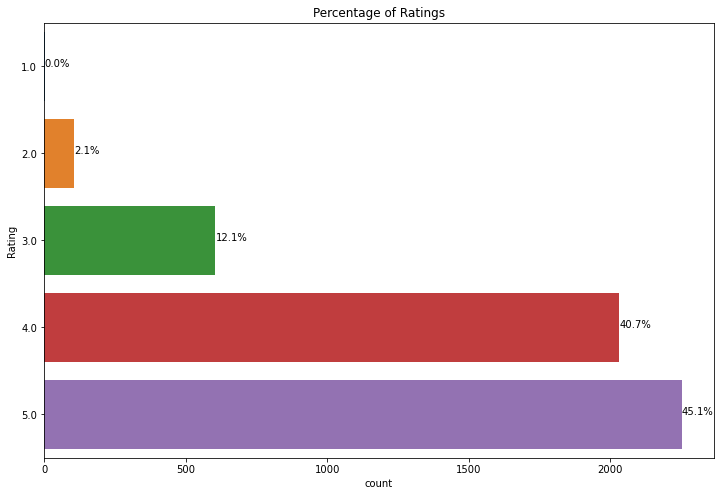

In [263]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = df)
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

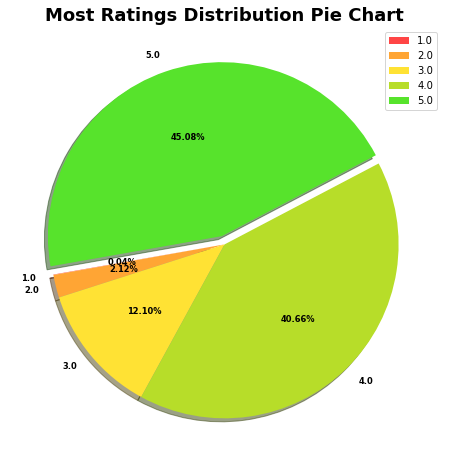

In [265]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

To remove the hyperlinks

In [266]:
for index, row in df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Review.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

df.head(10)

,Rating,Review,index
0,4.0,A Midrange phone from oneplus. why I choose th...,0
1,4.0,I was searching a smartphone in 25-30k segment...,1
2,4.0,Reviewing about the phone after being used sin...,2
3,4.0,"*Battery life is decent, if you're a heavy use...",3
4,4.0,Bought in big billion day sale but towards the...,4
5,4.0,After the six months of use i would like to sa...,5
6,4.0,One+ has established itself as a brand so payi...,6
7,4.0,"Somewhat disappointment on display, many brand...",7
8,4.0,Camera quality is not very good and except thi...,8
9,4.0,If u are not a game addict then this phone is ...,9


#stopwords

In [267]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [268]:
stop = stopwords.words('english')

df['stopwords'] = df['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Review','stopwords']].head()

,Review,stopwords
0,a midrange phone oneplus. i choose phone brand...,7
1,i searching smartphone 25-30k segment checked ...,3
2,reviewing phone used since 4 months.a phone aw...,2
3,"*battery life decent, heavy user get backup 12...",3
4,bought big billion day sale towards end. my ex...,5


In [271]:
df=df.drop(['stopwords'],axis=1)

In [272]:
df

,Rating,Review,index
0,4.0,a midrange phone oneplus. i choose phone brand...,0
1,4.0,i searching smartphone 25-30k segment checked ...,1
2,4.0,reviewing phone used since 4 months.a phone aw...,2
3,4.0,"*battery life decent, heavy user get backup 12...",3
4,4.0,bought big billion day sale towards end. my ex...,4
...,...,...,...
4995,5.0,graet,4995
4996,5.0,worth money,4996
4997,4.0,awesome,4997
4998,1.0,"hello friends,i bought brand new oneplus nord ...",4998


In [273]:
df = [Review.strip() for Review in df.Review] 
df = [Review for Review in df if Review] 

In [274]:
df[0:5]

['a midrange phone oneplus. i choose phone brand value option like vivo t1 / realme 9 /9 pro / oppo/ motorola oneplus premium feel reason i given four star.......1). the amoled display important.2) the wide angle lens also there.3) removed alert slider. otherwise phone perfect i satisfied device 95% definitely go it. important thing red cable available signature oneplus mobile also oxygen os perfect i like give extremely performance fill like { makhan malai }.thank ❤️\u200d🔥',
 'i searching smartphone 25-30k segment checked lot phones could find good phone screen fps dedicated sim/mc slot suddenly i checked google 1+ also launching phones features i watched unboxing video decided buy phone brightness display battery good definitely awesome per performance brand 1+ phone good 23000 (including cards discount) antutu 5lac antutu iphone 12 (rs 42k cost) 6.25 lac deal bad, planing buy check phone showroom ytube.',
 'reviewing phone used since 4 months.a phone awesome i loved design stabilit

In [275]:
nlp = spacy.load('en_core_web_md')

doc_block = nlp(''.join(df))
spacy.displacy.render(doc_block[0:5], style = 'ent', jupyter = True)

C:\Users\HP\anaconda3\lib\site-packages\spacy\displacy\__init__.py:206: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [215]:
doc_block

midrange phone oneplus. choose phone brand value option like vivo t1 / realme 9 /9 pro / oppo/ motorola oneplus premium feel reason given four star.......1). amoled display important.2) wide angle lens also there.3) removed alert slider. otherwise phone perfect satisfied device 95% definitely go it. important thing red cable available signature oneplus mobile also oxygen os perfect like give extremely performance fill like { makhan malai }.thank ❤️‍🔥searching smartphone 25-30k segment checked lot phones could find good phone screen fps dedicated sim/mc slot suddenly checked google 1+ also launching phones features watched unboxing video decided buy phone brightness display battery good definitely awesome per performance brand 1+ phone good 23000 (including cards discount) antutu 5lac antutu iphone 12 (rs 42k cost) 6.25 lac deal bad, planing buy check phone showroom ytube.reviewing phone used since 4 months.a phone awesome loved design stability. camera disappointed element phone. never

In [276]:
for token in doc_block:
    print(token, token.pos_)

a DET
midrange ADJ
phone NOUN
oneplus NOUN
. PUNCT
i PRON
choose VERB
phone NOUN
brand NOUN
value NOUN
option NOUN
like ADP
vivo PROPN
t1 PROPN
/ SYM
realme PROPN
9 NUM
/9 SYM
pro X
/ SYM
oppo/ X
motorola PROPN
oneplus CCONJ
premium NOUN
feel NOUN
reason NOUN
i PRON
given VERB
four NUM
star NOUN
....... PUNCT
1 X
) PUNCT
. PUNCT
the DET
amoled ADJ
display NOUN
important.2 SPACE
) PUNCT
the DET
wide ADJ
angle NOUN
lens NOUN
also ADV
there.3 NOUN
) PUNCT
removed VERB
alert NOUN
slider NOUN
. PUNCT
otherwise ADV
phone NOUN
perfect ADJ
i PRON
satisfied ADJ
device NOUN
95 NUM
% NOUN
definitely ADV
go VERB
it PRON
. PUNCT
important ADJ
thing NOUN
red ADJ
cable NOUN
available ADJ
signature NOUN
oneplus CCONJ
mobile NOUN
also ADV
oxygen NOUN
os INTJ
perfect ADJ
i PRON
like INTJ
give VERB
extremely ADV
performance NOUN
fill NOUN
like ADP
{ PUNCT
makhan PROPN
malai PROPN
} PUNCT
.thank PROPN
❤ ADP
️‍ PUNCT
🔥 ADP
i PRON
searching VERB
smartphone ADJ
25 NUM
- PUNCT
30k NUM
segment NOUN
checked VER

In [277]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs[0:5]

['phone', 'oneplus', 'choose', 'phone', 'brand']

In [278]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
wf_df = pd.DataFrame(word_freq, columns = ['Word', 'Count'])
wf_df = wf_df.sort_values(by ='Count', ascending = False)
wf_df = wf_df.reset_index(drop = True)
wf_df

,Word,Count
0,phone,1528
1,camera,1104
2,battery,784
3,quality,748
4,price,347
...,...,...
4050,timesgoodgood,1
4051,speedglassy,1
4052,llokall,1
4053,poorgoodbattery,1


<AxesSubplot:xlabel='Word', ylabel='Count'>

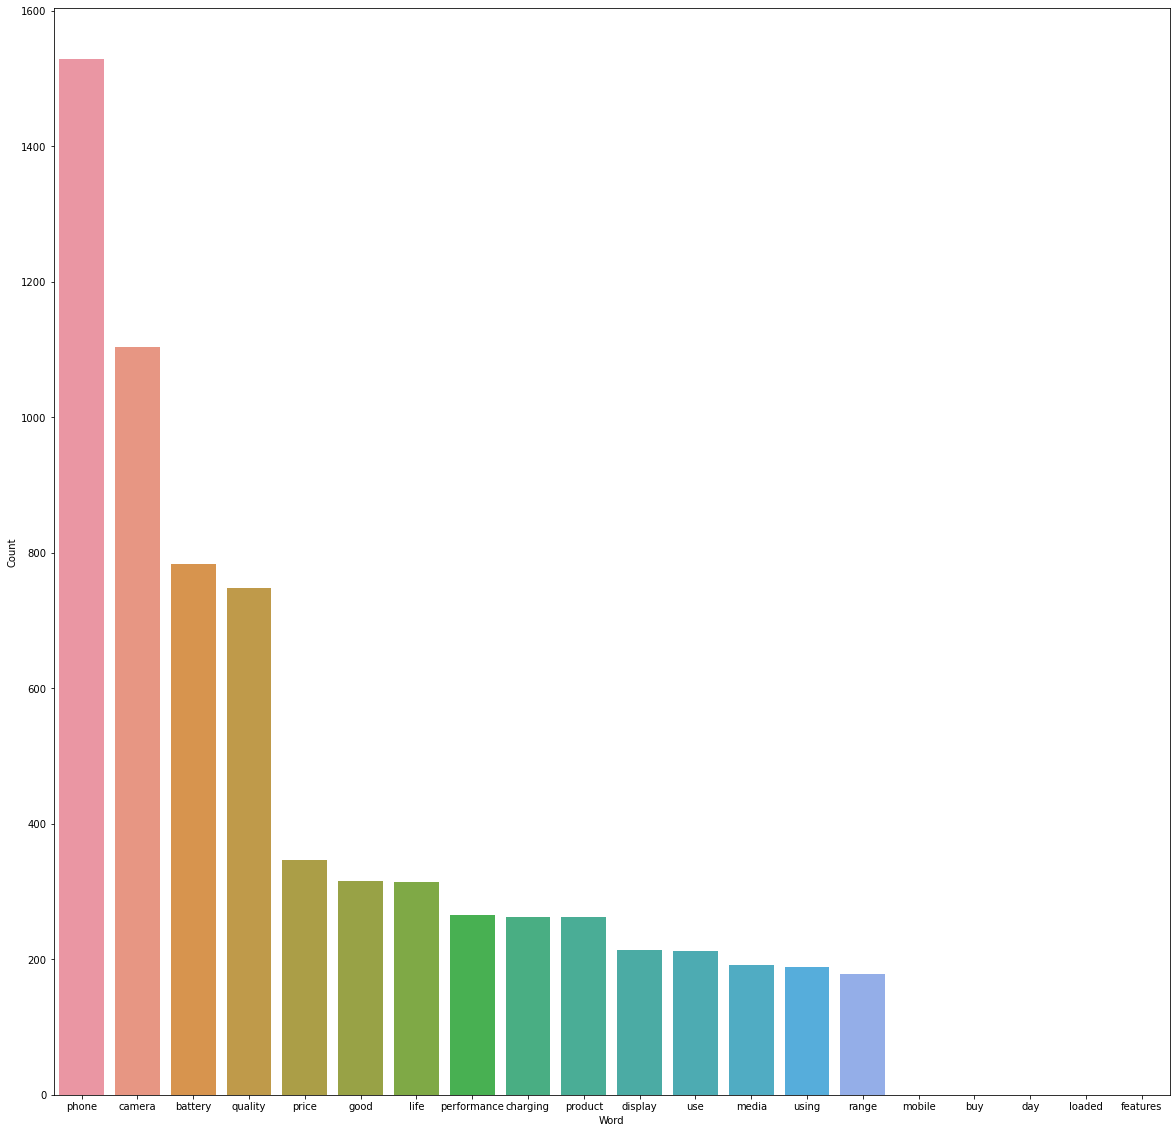

In [279]:
plt.figure(figsize = (20,20))
sns.barplot(x = wf_df['Word'][0:20], y = wf_df['Count'][0:15])

In [280]:
afinn = pd.read_csv("C:\\Users\\HP\\Downloads\\Afinn.csv", sep = ',', encoding = 'latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [281]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [282]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences[0:10]

['a midrange phone oneplus.',
 'i choose phone brand value option like vivo t1 / realme 9 /9 pro / oppo/ motorola oneplus premium feel reason i given four star.......1).',
 'the amoled display important.2) the wide angle lens also there.3) removed alert slider.',
 'otherwise phone perfect i satisfied device 95% definitely go it.',
 'important thing red cable available signature oneplus mobile also oxygen os perfect i like give extremely performance fill like { makhan malai }.thank ❤️\u200d🔥 i searching smartphone 25-30k segment checked lot phones could find good phone screen fps dedicated sim/mc slot suddenly i checked google 1+ also launching phones features i watched unboxing video decided buy phone brightness display battery good definitely awesome per performance brand 1+ phone good 23000 (including cards discount) antutu 5lac antutu iphone 12 (rs 42k cost) 6.25 lac deal bad, planing buy check phone showroom ytube.',
 'reviewing phone used since 4 months.a phone awesome i loved des

In [283]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,a midrange phone oneplus.
1,i choose phone brand value option like vivo t1...
2,the amoled display important.2) the wide angle...
3,otherwise phone perfect i satisfied device 95%...
4,important thing red cable available signature ...
...,...
3486,"i associated amazon since quite long done ""n"" ..."
3487,"transaction, however never faced issues return..."
3488,this manufacturing defect oneplus & amazon sto...
3489,"i escalating amazon owner, let's see, get supp..."


In [284]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [290]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

Lemmatised form

In [286]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [292]:
sent_df['Sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['Sentence_length'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,Sentiment_value,Sentence_length
0,a midrange phone oneplus.,0,4
1,i choose phone brand value option like vivo t1...,2,25
2,the amoled display important.2) the wide angle...,-1,13
3,otherwise phone perfect i satisfied device 95%...,5,10
4,important thing red cable available signature ...,20,91
...,...,...,...
3486,"i associated amazon since quite long done ""n"" ...",0,9
3487,"transaction, however never faced issues return...",0,15
3488,this manufacturing defect oneplus & amazon sto...,-2,14
3489,"i escalating amazon owner, let's see, get supp...",2,12


In [293]:
sent_df['sentiment'] = sent_df['Sentiment_value'].apply(lambda c: 'Positive' if c >=0 else ('Negative' if c<=0  else 'Neutral'))
sent_df

,sentence,Sentiment_value,Sentence_length,sentiment
0,a midrange phone oneplus.,0,4,Positive
1,i choose phone brand value option like vivo t1...,2,25,Positive
2,the amoled display important.2) the wide angle...,-1,13,Negative
3,otherwise phone perfect i satisfied device 95%...,5,10,Positive
4,important thing red cable available signature ...,20,91,Positive
...,...,...,...,...
3486,"i associated amazon since quite long done ""n"" ...",0,9,Positive
3487,"transaction, however never faced issues return...",0,15,Positive
3488,this manufacturing defect oneplus & amazon sto...,-2,14,Negative
3489,"i escalating amazon owner, let's see, get supp...",2,12,Positive


In [295]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,Sentiment_value,Sentence_length,sentiment,index
0,a midrange phone oneplus.,0,4,Positive,0
1,i choose phone brand value option like vivo t1...,2,25,Positive,1
2,the amoled display important.2) the wide angle...,-1,13,Negative,2
3,otherwise phone perfect i satisfied device 95%...,5,10,Positive,3
4,important thing red cable available signature ...,20,91,Positive,4
...,...,...,...,...,...
3486,"i associated amazon since quite long done ""n"" ...",0,9,Positive,3486
3487,"transaction, however never faced issues return...",0,15,Positive,3487
3488,this manufacturing defect oneplus & amazon sto...,-2,14,Negative,3488
3489,"i escalating amazon owner, let's see, get supp...",2,12,Positive,3489


In [297]:
sent_df.sort_values(by='Sentiment_value').head()

,sentence,Sentiment_value,Sentence_length,sentiment,index
3376,"quality phone 10k range phones, difference exc...",-9,36,Negative,3376
716,!bt suggest never sold amazon ..refund easily ...,-6,37,Negative,716
616,(no scam or fake product or defective on my ca...,-6,15,Negative,616
1585,i bit worried performance definitely worsen pa...,-6,8,Negative,1585
1723,"though, admit missed punchiness amoled panel.o...",-6,18,Negative,1723


In [298]:
sent_df.sort_values(by='Sentiment_value').tail()

,sentence,Sentiment_value,Sentence_length,sentiment,index
769,ok superb go it...✌️ osm ek number good phone ...,62,108,Positive,769
895,"only 2 week's now,so far good, alexa much sati...",62,78,Positive,895
2995,iam using past 4 weeks given reviewmobile awes...,65,149,Positive,2995
3328,good luck i like phone battery life good displ...,86,159,Positive,3328
1300,good product camera quality badno battery life...,97,272,Positive,1300


<AxesSubplot:xlabel='index', ylabel='Sentiment_value'>

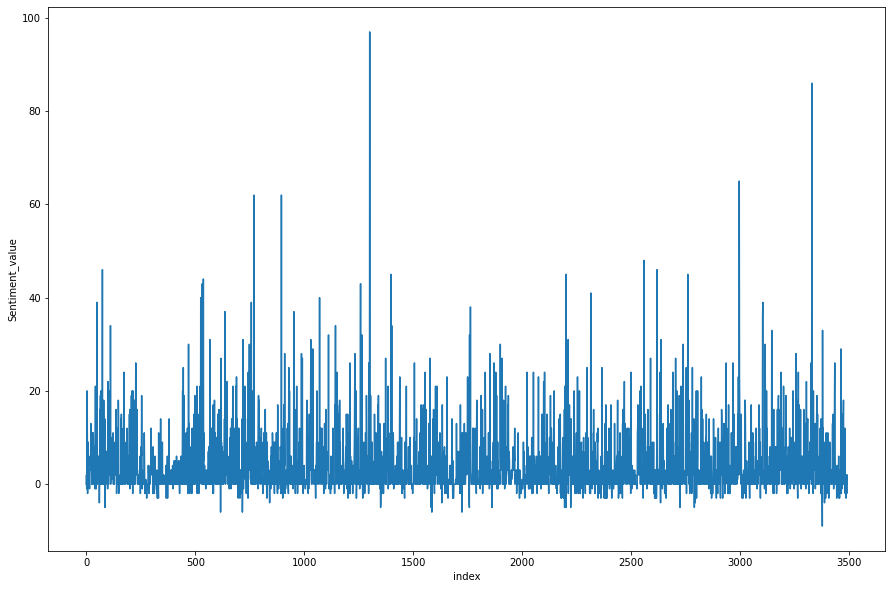

In [300]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='Sentiment_value',x='index',data=sent_df)

Most of the lines are above 0,So the people review is more positive about the product

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_value', ylabel='Density'>

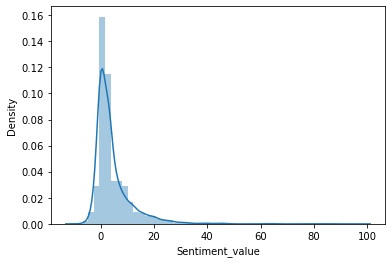

In [302]:
sns.distplot(sent_df['Sentiment_value'])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='Sentence_length', ylabel='Sentiment_value'>

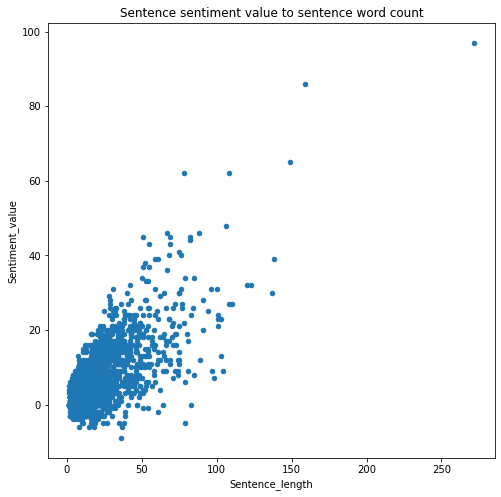

In [303]:
sent_df.plot.scatter(x='Sentence_length', y='Sentiment_value', figsize=(8,8), 
                     title='Sentence sentiment value to sentence word count')

# conclusion

People reviews about the product is POSITIVE